In [3]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [23]:
from google.colab import files

uploaded = files.upload()

Saving Data.csv to Data (1).csv


In [4]:
# Reading the dataset

base_data = pd.read_csv('Data.csv')

base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
base_data.shape

(110527, 14)

In [6]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Modifying the date and time into standard form.

In [7]:
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


For the schedule day and appointment day storing the weekdays only into a variable ie., 5 is Saturday and 6 is Sunday.

In [8]:
base_data['sch_weekday']= base_data['ScheduledDay'].dt.dayofweek
base_data['app_weekday']= base_data['AppointmentDay'].dt.dayofweek

In [9]:
base_data['sch_weekday'].value_counts()

,count
sch_weekday,
1,26168
2,24262
0,23085
4,18915
3,18073
5,24


In [10]:
base_data['app_weekday'].value_counts()

,count
app_weekday,
2,25867
1,25640
0,22715
4,19019
3,17247
5,39


In [11]:
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [12]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [13]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  sch_weekday     110527 non-null  int

Changing the names of some columns

In [14]:
base_data = base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show':'NoShow'})

In [15]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [16]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

Dropping some columns which have no significance

In [17]:
base_data.drop(['Neighbourhood'], axis=1, inplace=True)

In [18]:
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [19]:
# Convert 'PatientId' to integer type
base_data['PatientId'] = base_data['PatientId'].astype(int)

# Display the first few rows to see the change
display(base_data.head())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [20]:
base_data.describe()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,1.105270e+05,1.105270e+05,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,3.921700e+04,5.030230e+06,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.173184e+13,5.680573e+06,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,9.439172e+13,5.725524e+06,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,2.560949e+14,7.129575e+04,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


Text(0.5, 1.02, 'Count of Target Variable per category')

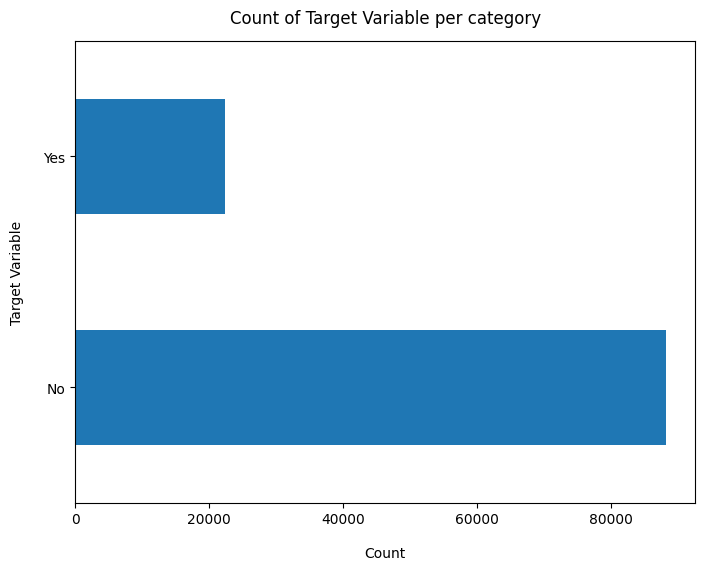

In [21]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable per category", y =1.02)

Calculating the % of appointments

In [22]:
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

,count
NoShow,
No,79.806744
Yes,20.193256


In [23]:
base_data['NoShow'].value_counts()

,count
NoShow,
No,88208
Yes,22319


Let's look at the data containing missing values

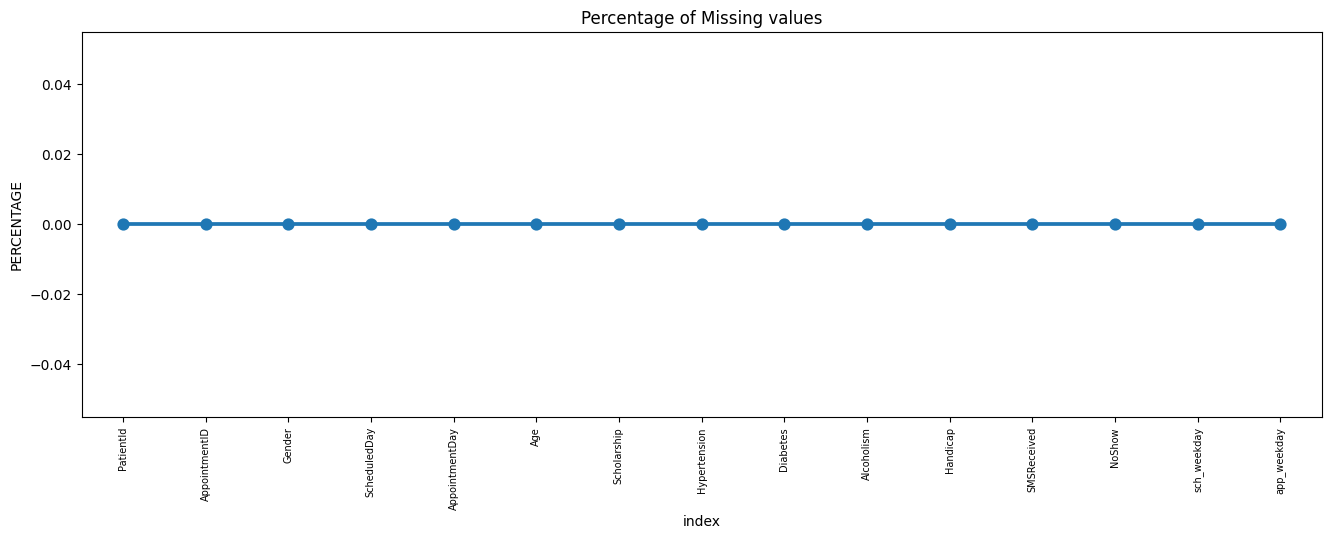

In [24]:
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x="index", y=0, data=missing)
plt.xticks(rotation =90, fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

####**Missing Data - Initial Intuition**

*   Here, we don't have any missing data.
####**General Thumb Rules:**


*   For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
*   For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
*   As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.








##**Data Cleaning**

1. Create a copy of base data for manipulation and processing.

In [25]:
new_data = base_data.copy()

In [26]:
new_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [27]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Scholarship     110527 non-null  int64         
 7   Hypertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handicap        110527 non-null  int64         
 11  SMSReceived     110527 non-null  int64         
 12  NoShow          110527 non-null  object        
 13  sch_weekday     110527 non-null  int32         
 14  app_weekday     110527 non-null  int

As we don't have any null records, there's no data cleaning required.

In [28]:
# Get the max tenure.
print(base_data['Age'].max())

115


In [29]:
# Group the tenure in bins of 12 months.

bins = range(1, 130, 12)
labels = ["{0} - {1}".format(i, i + 11) for i in bins[:-1]] # Correcting the labels based on the bins
new_data['Age_groups'] = pd.cut(new_data.Age, bins=bins, right=False, labels=labels)

Data Exploration

In [30]:
list(new_data.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_groups']

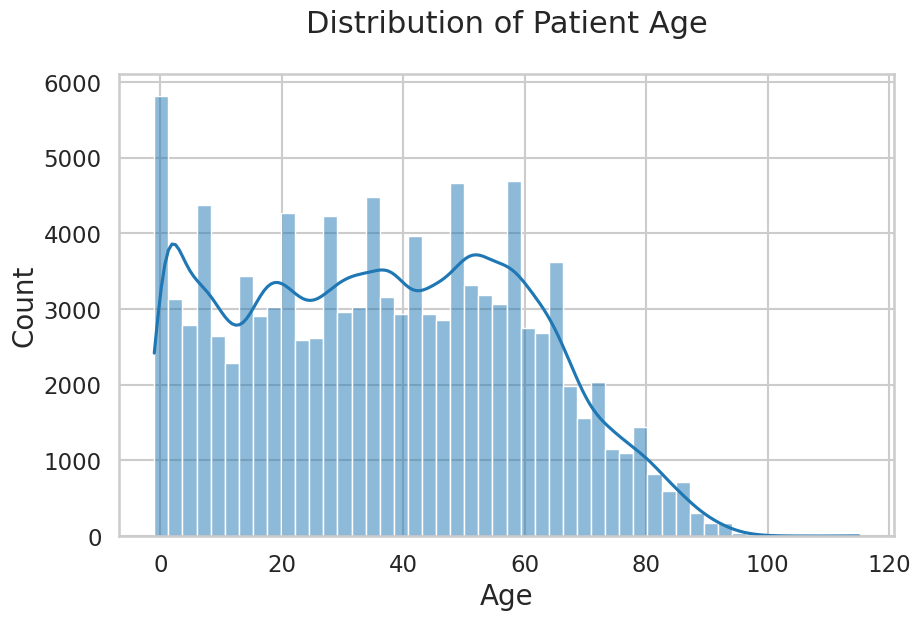

In [68]:
# Distribution of patient demographics (Age, Gender)
plt.figure(figsize=(10,6))
sns.histplot(data=base_data, x='Age', bins=50, kde=True)
plt.title("Distribution of Patient Age")
plt.show()

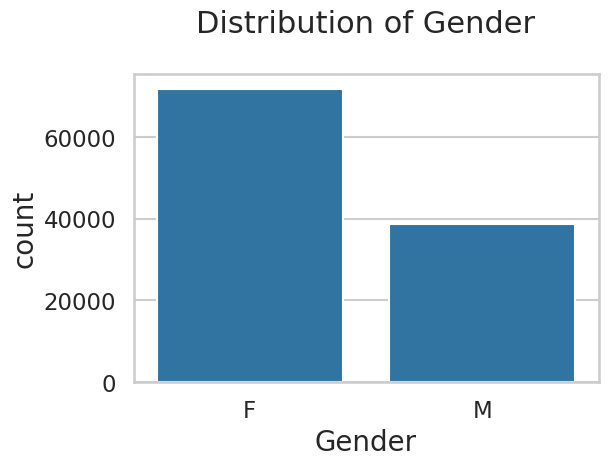

In [69]:

plt.figure(figsize=(6,4))
sns.countplot(data=base_data, x='Gender')
plt.title("Distribution of Gender")
plt.show()

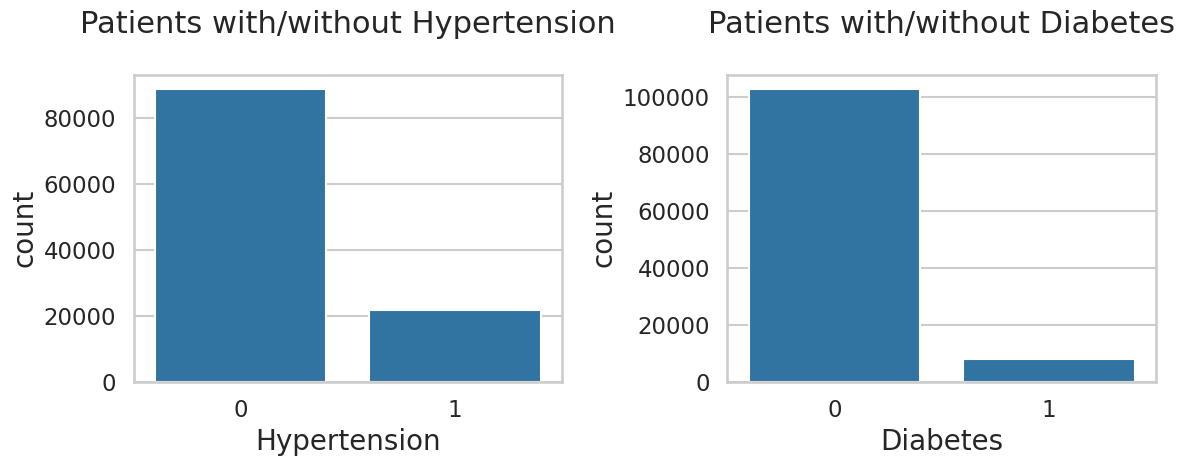

In [71]:
# Overview of medical conditions (Hypertension, Diabetes)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(data=base_data, x='Hypertension', ax=axes[0])
axes[0].set_title("Patients with/without Hypertension")

sns.countplot(data=base_data, x='Diabetes', ax=axes[1])
axes[1].set_title("Patients with/without Diabetes")

plt.tight_layout()
plt.show()

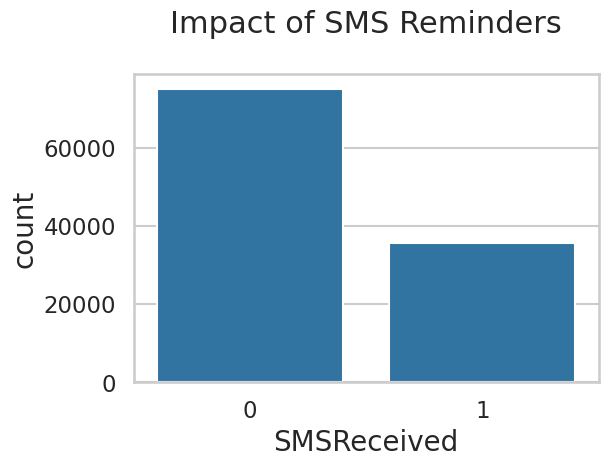

In [72]:
#  Impact of receiving SMS reminders
plt.figure(figsize=(6,4))
sns.countplot(data=base_data, x='SMSReceived')
plt.title("Impact of SMS Reminders")
plt.show()

---------- Gender ----------
Gender
F    0.649977
M    0.350023
Name: proportion, dtype: float64


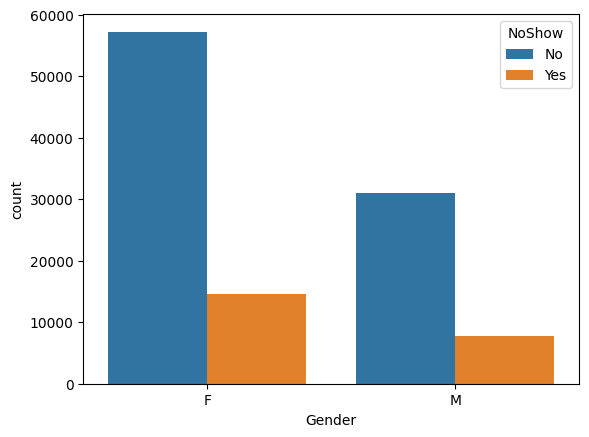

---------- ScheduledDay ----------
ScheduledDay
2016-05-03    0.038344
2016-05-02    0.038145
2016-05-16    0.037276
2016-05-05    0.037050
2016-05-10    0.036407
                ...   
2016-01-27    0.000009
2016-01-19    0.000009
2016-06-04    0.000009
2016-01-26    0.000009
2016-03-05    0.000009
Name: proportion, Length: 111, dtype: float64


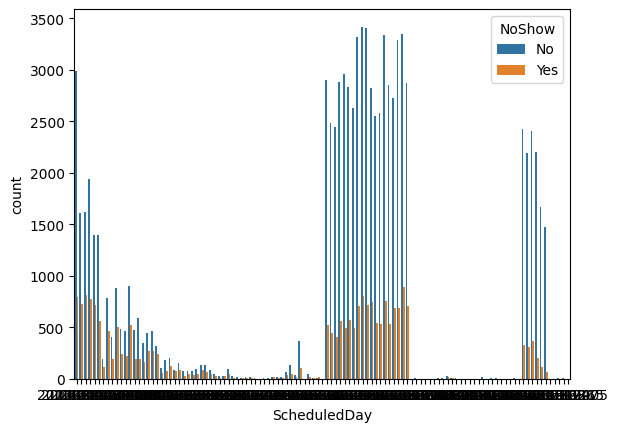

---------- AppointmentDay ----------
AppointmentDay
2016-06-06    0.042451
2016-05-16    0.041736
2016-05-09    0.040895
2016-05-30    0.040841
2016-06-08    0.040524
2016-05-11    0.040479
2016-06-01    0.040388
2016-06-07    0.039954
2016-05-12    0.039755
2016-05-02    0.039592
2016-05-18    0.039565
2016-05-17    0.039556
2016-06-02    0.038995
2016-05-10    0.038977
2016-05-31    0.038715
2016-05-05    0.038660
2016-05-19    0.038633
2016-05-03    0.038506
2016-05-04    0.037710
2016-06-03    0.037005
2016-05-24    0.036272
2016-05-13    0.036073
2016-05-25    0.035367
2016-05-06    0.035095
2016-05-20    0.034634
2016-04-29    0.029269
2016-05-14    0.000353
Name: proportion, dtype: float64


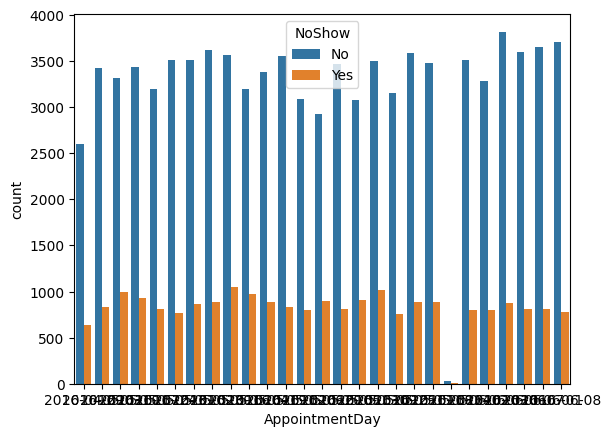

---------- Scholarship ----------
Scholarship
0    0.901734
1    0.098266
Name: proportion, dtype: float64


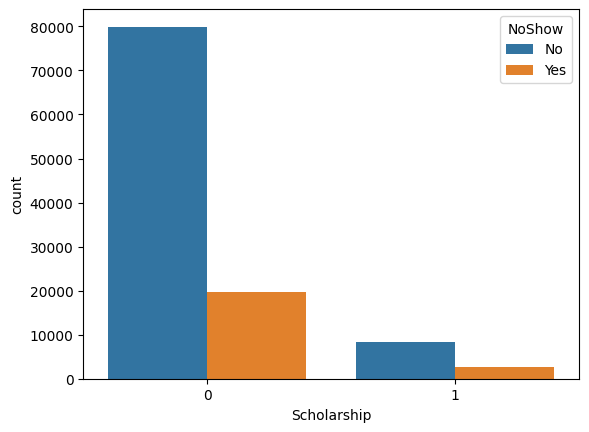

---------- Hypertension ----------
Hypertension
0    0.802754
1    0.197246
Name: proportion, dtype: float64


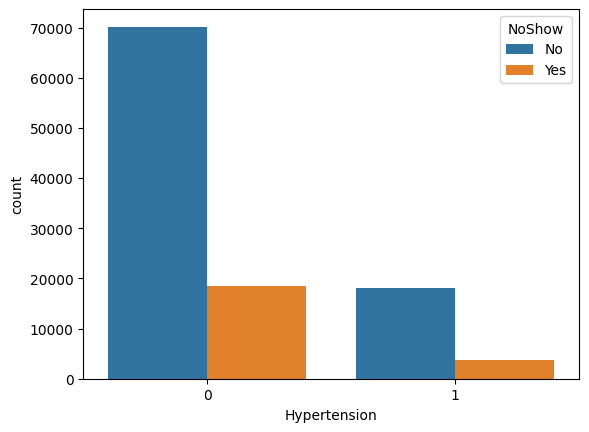

---------- Diabetes ----------
Diabetes
0    0.928135
1    0.071865
Name: proportion, dtype: float64


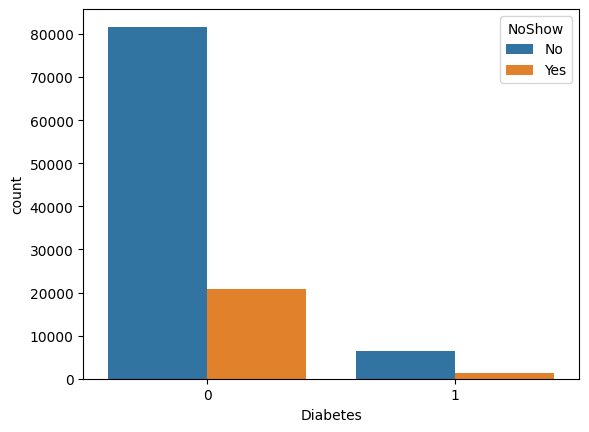

---------- Alcoholism ----------
Alcoholism
0    0.9696
1    0.0304
Name: proportion, dtype: float64


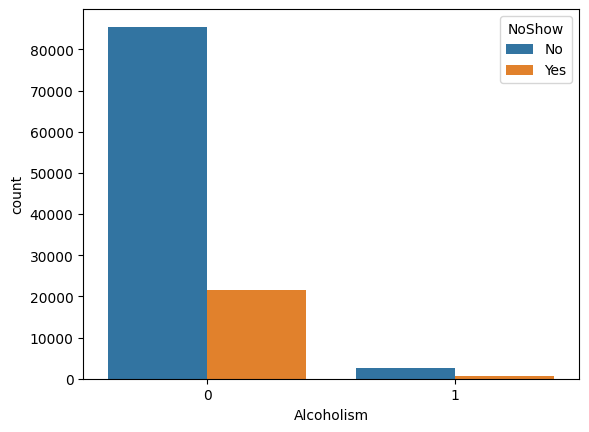

---------- Handicap ----------
Handicap
0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: proportion, dtype: float64


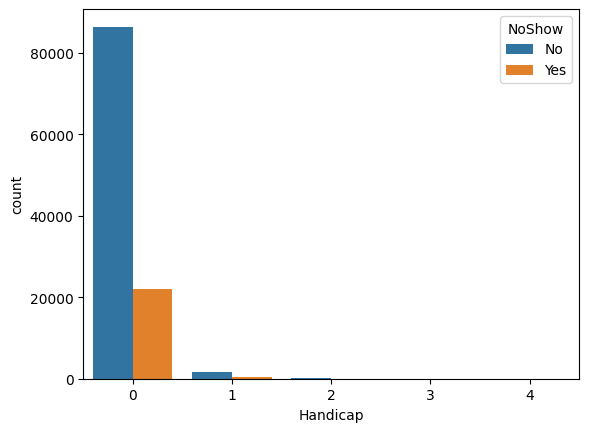

---------- SMSReceived ----------
SMSReceived
0    0.678974
1    0.321026
Name: proportion, dtype: float64


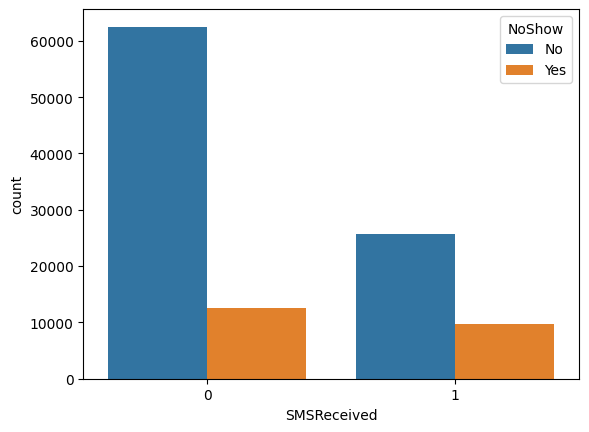

---------- sch_weekday ----------
sch_weekday
1    0.236757
2    0.219512
0    0.208863
4    0.171135
3    0.163517
5    0.000217
Name: proportion, dtype: float64


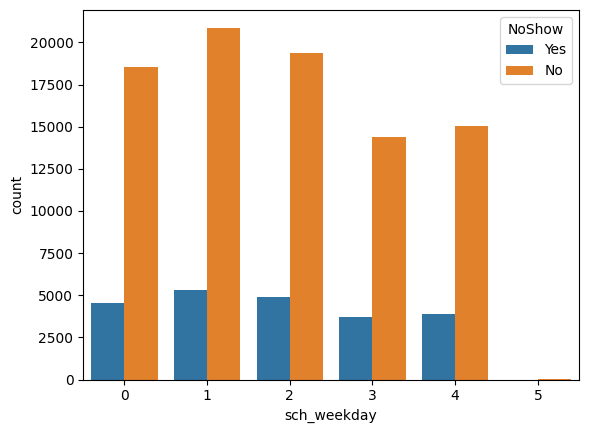

---------- app_weekday ----------
app_weekday
2    0.234033
1    0.231980
0    0.205515
4    0.172076
3    0.156043
5    0.000353
Name: proportion, dtype: float64


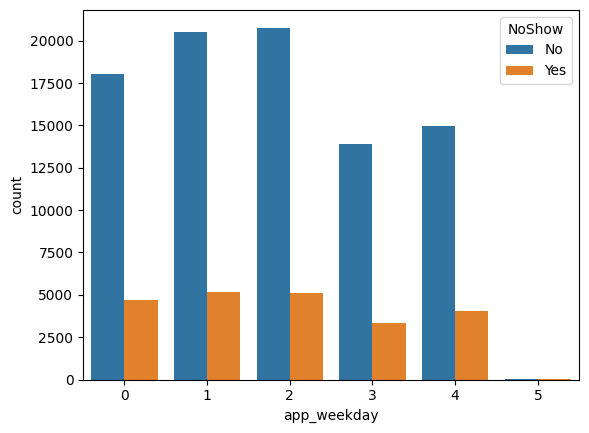

---------- Age_groups ----------
Age_groups
49 - 60      0.176900
1 - 12       0.163543
25 - 36      0.161851
37 - 48      0.161281
13 - 24      0.151710
61 - 72      0.116827
73 - 84      0.054474
85 - 96      0.013142
97 - 108     0.000224
109 - 120    0.000047
Name: proportion, dtype: float64


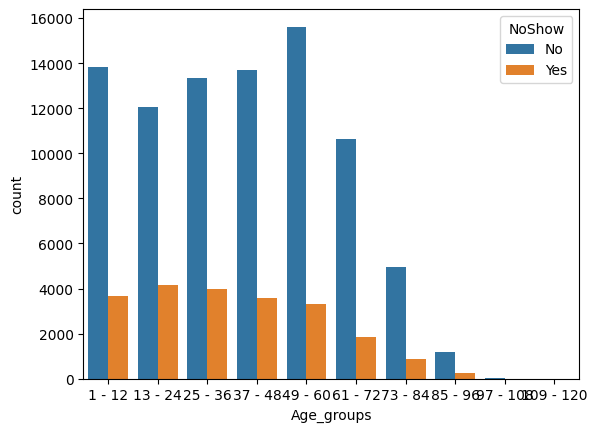

In [31]:
# having a look into the values of count of each columns and there count in respect to NoShow column

for i, predictor in enumerate(new_data.drop(columns=['PatientId','AppointmentID','Age','NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(new_data[predictor].value_counts(normalize=True))
    plt.figure(i)
    sns.countplot(data=new_data, x=predictor, hue='NoShow')
    plt.show()


In [32]:
new_data['NoShow'] = np.where(new_data.NoShow == 'Yes', 1, 0)

In [33]:
base_data.NoShow.value_counts()

,count
NoShow,
No,88208
Yes,22319


Convert all the catergorical variables into dummy variables

In [34]:
new_data_dummy = pd.get_dummies(new_data)
new_data_dummy.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,Age_groups_1 - 12,Age_groups_13 - 24,Age_groups_25 - 36,Age_groups_37 - 48,Age_groups_49 - 60,Age_groups_61 - 72,Age_groups_73 - 84,Age_groups_85 - 96,Age_groups_97 - 108,Age_groups_109 - 120
0,29872499824296,5642903,2016-04-29,2016-04-29,62,0,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1,558997776694438,5642503,2016-04-29,2016-04-29,56,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,4262962299951,5642549,2016-04-29,2016-04-29,62,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,867951213174,5642828,2016-04-29,2016-04-29,8,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
4,8841186448183,5642494,2016-04-29,2016-04-29,56,0,1,1,0,0,...,False,False,False,False,True,False,False,False,False,False


Build a corelation of all predictors with 'NoShow'

<Axes: >

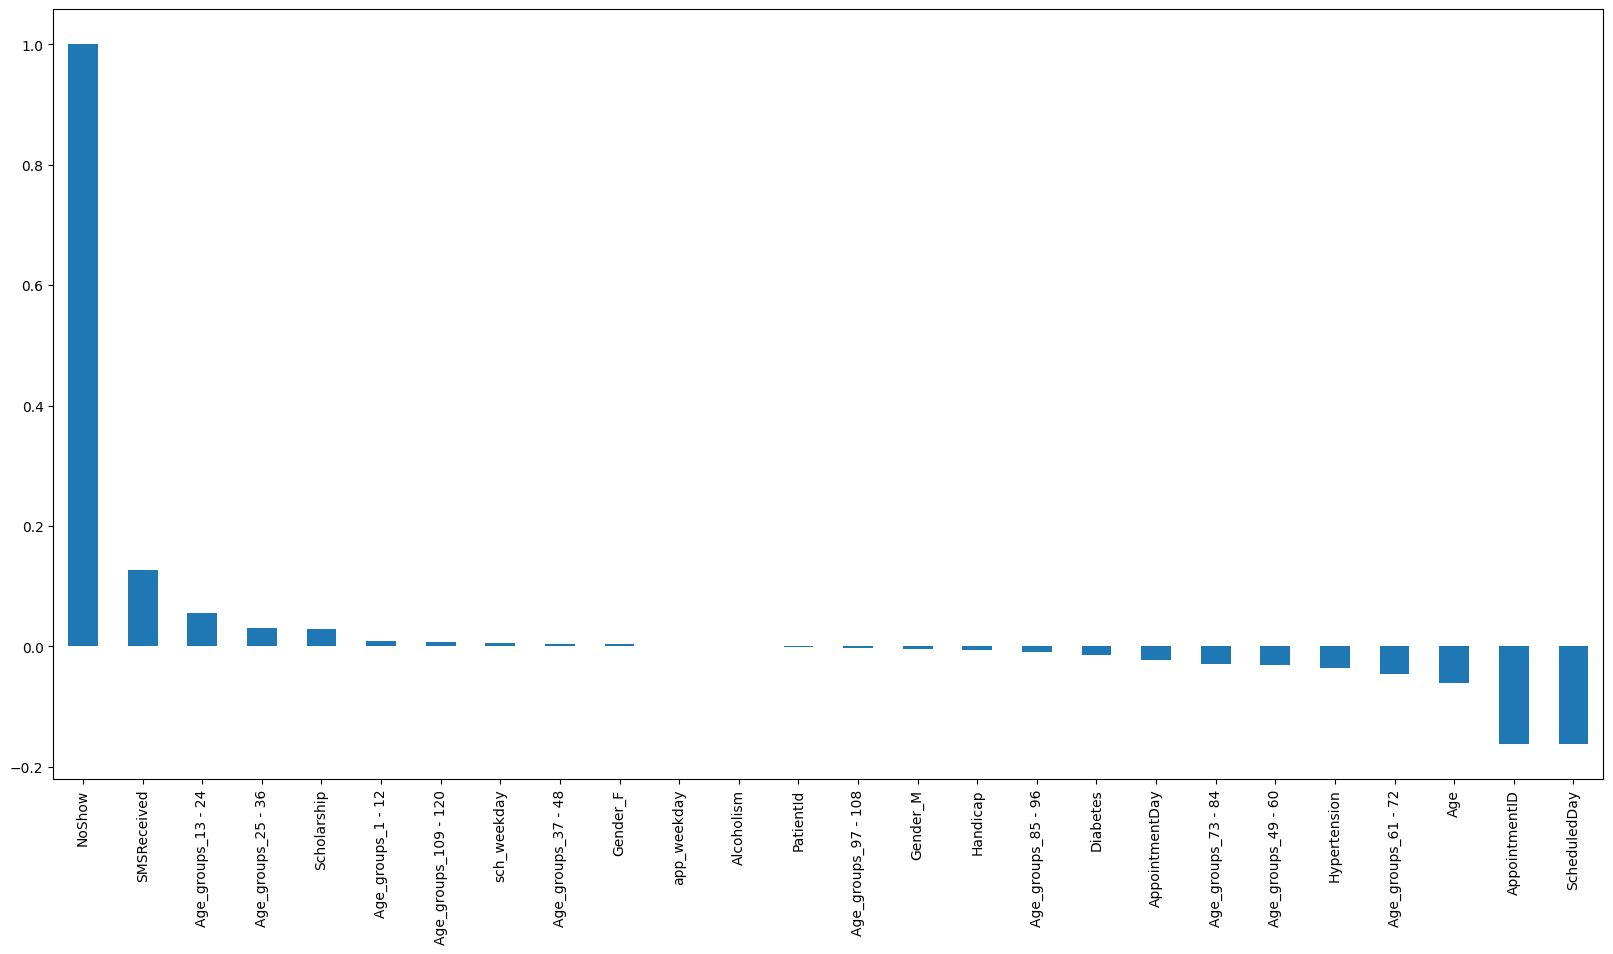

In [35]:
plt.figure(figsize=(20,10))
new_data_dummy.corr()['NoShow'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

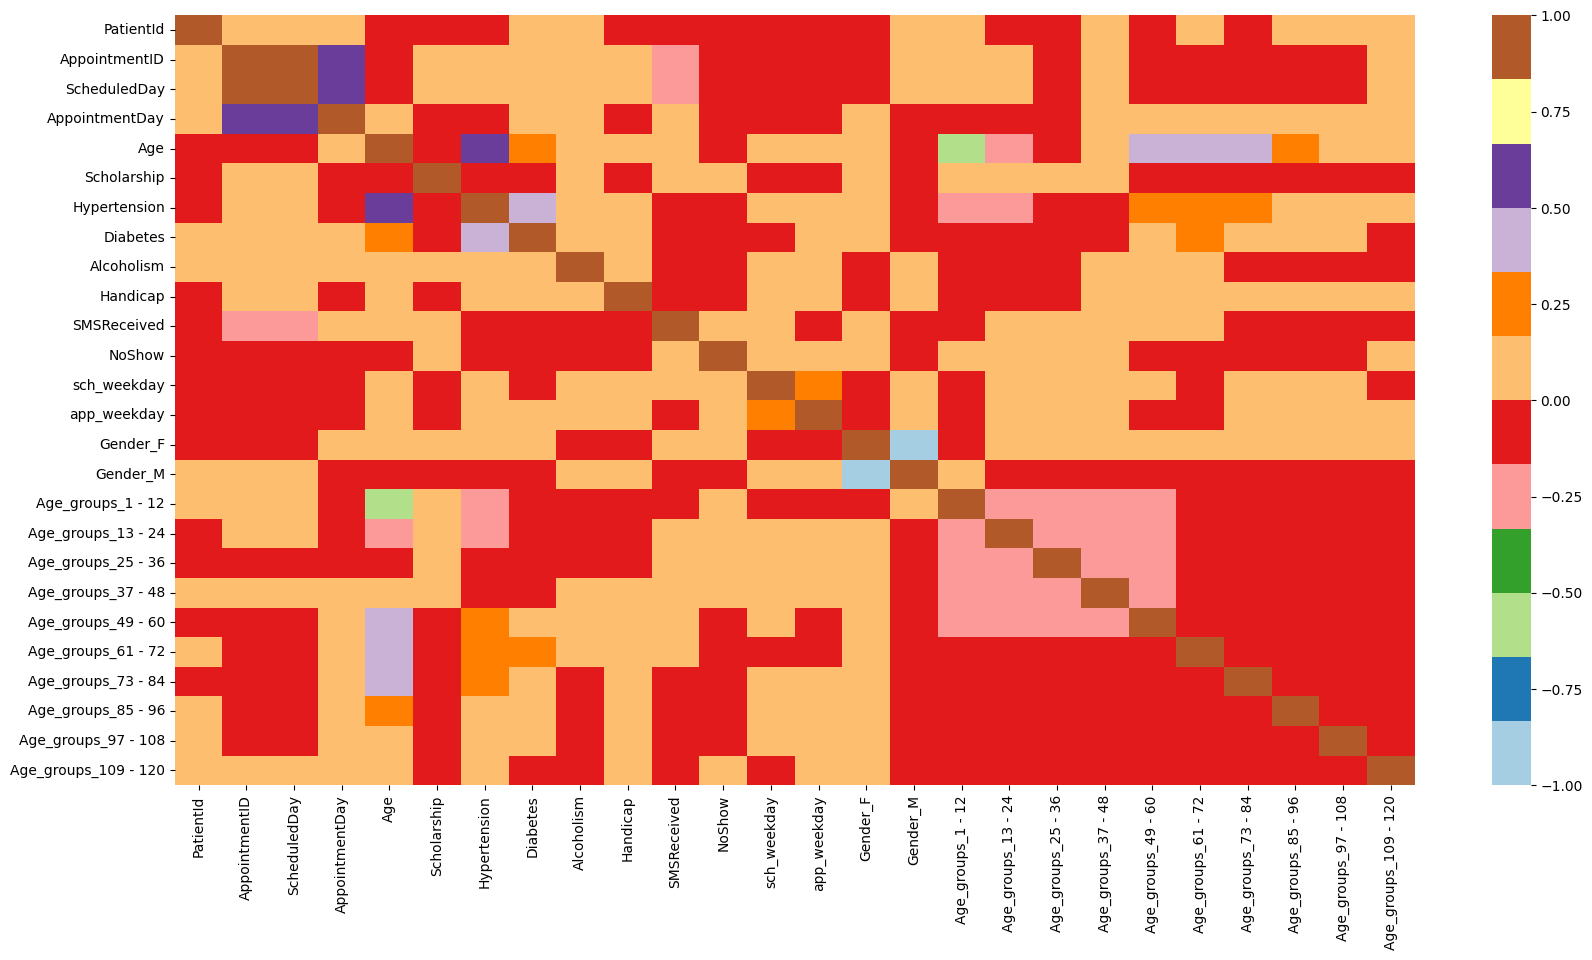

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(new_data_dummy.corr(), cmap="Paired")

#**Bivariate Analysis**

##Attendance by Age, Gender

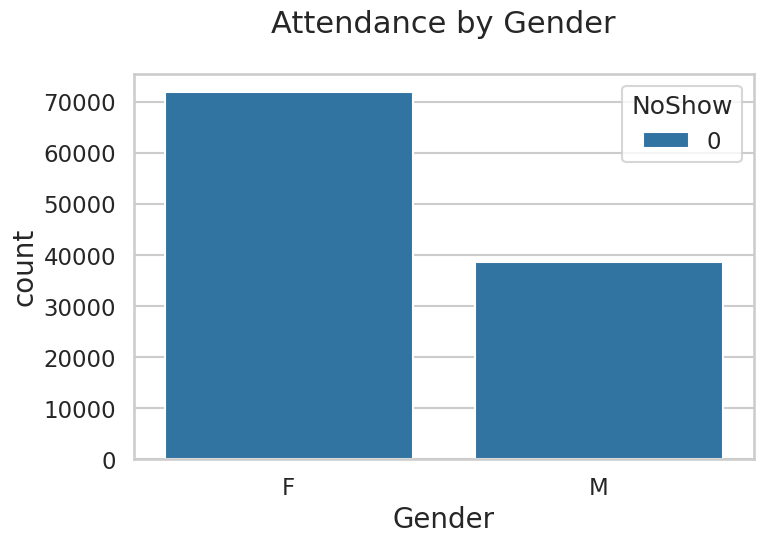

In [91]:

plt.figure(figsize=(8,5))
sns.countplot(data=new_data, x='Gender', hue='NoShow')
plt.title("Attendance by Gender")
plt.show()

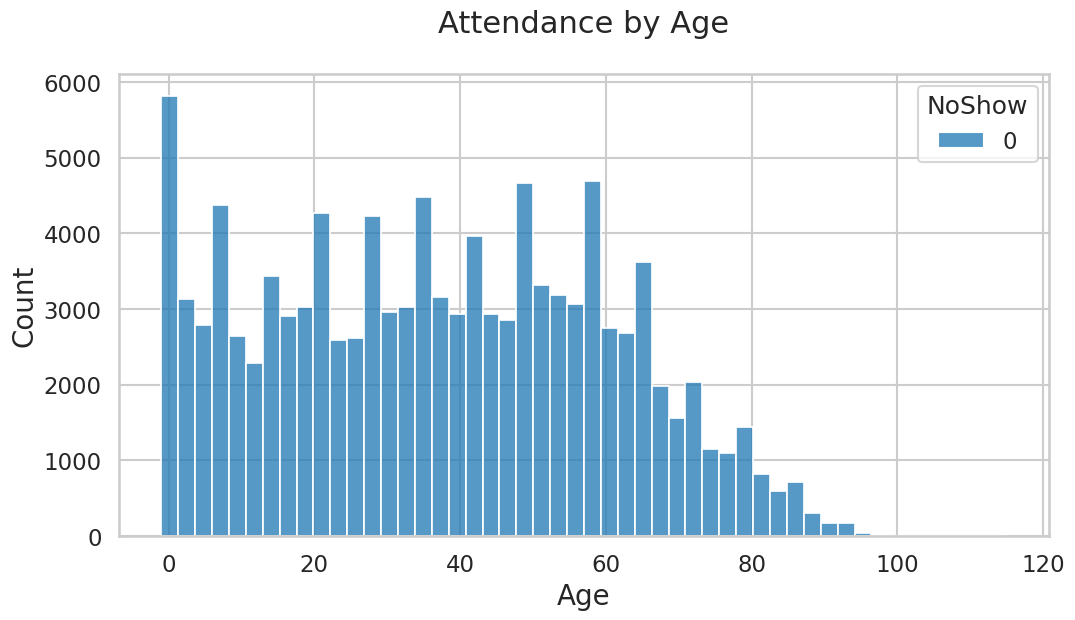

In [98]:
plt.figure(figsize=(12,6))
sns.histplot(data=new_data, x='Age', hue='NoShow', bins=50, kde=False, multiple='stack')
plt.title("Attendance by Age")
plt.show()


## Effect of Scholarship, Hypertension, Diabetes

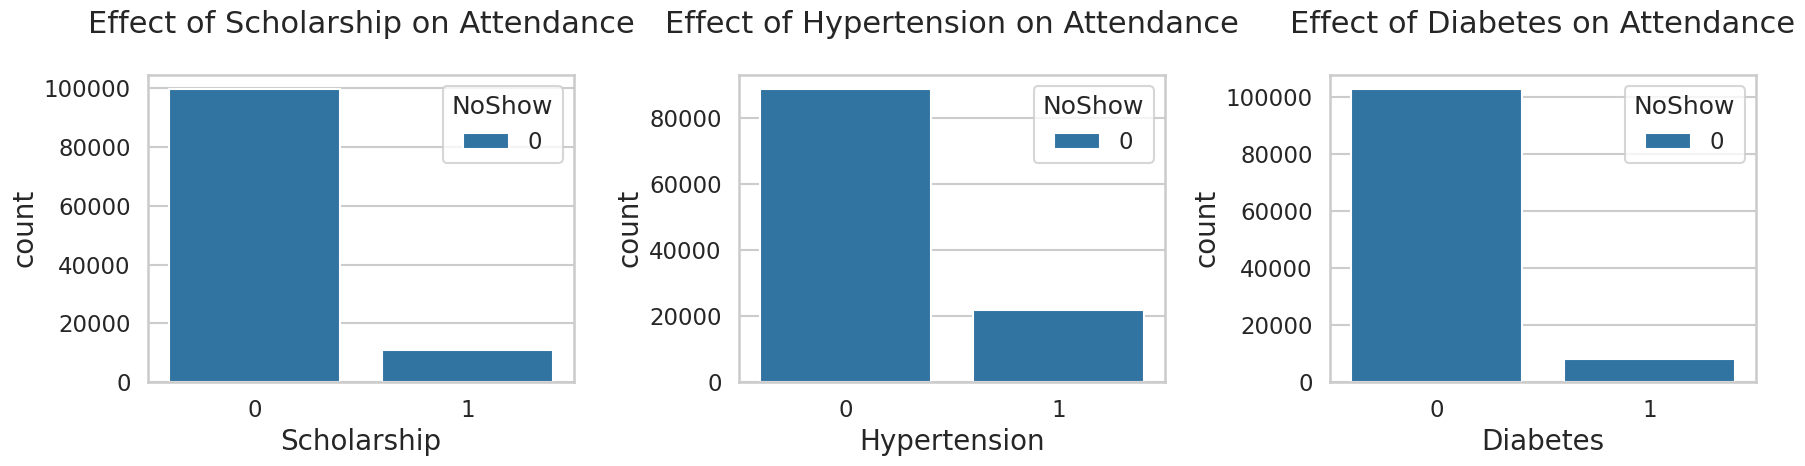

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(data=new_data, x='Scholarship', hue='NoShow', ax=axes[0])
axes[0].set_title("Effect of Scholarship on Attendance")

sns.countplot(data=new_data, x='Hypertension', hue='NoShow', ax=axes[1])
axes[1].set_title("Effect of Hypertension on Attendance")

sns.countplot(data=new_data, x='Diabetes', hue='NoShow', ax=axes[2])
axes[2].set_title("Effect of Diabetes on Attendance")

plt.tight_layout()
plt.show()

In [88]:
new_df1_target0=new_data.loc[new_data["NoShow"]==0]
new_df1_target1=new_data.loc[new_data["NoShow"]==1]

In [64]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

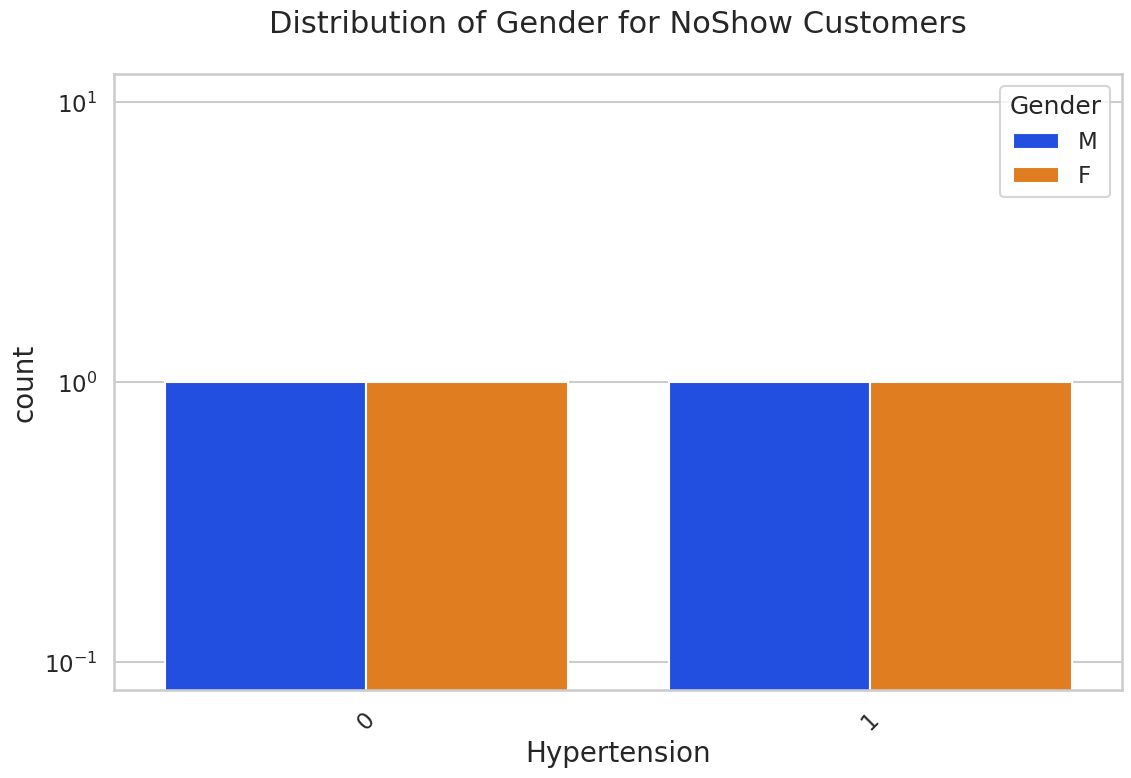

In [66]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')


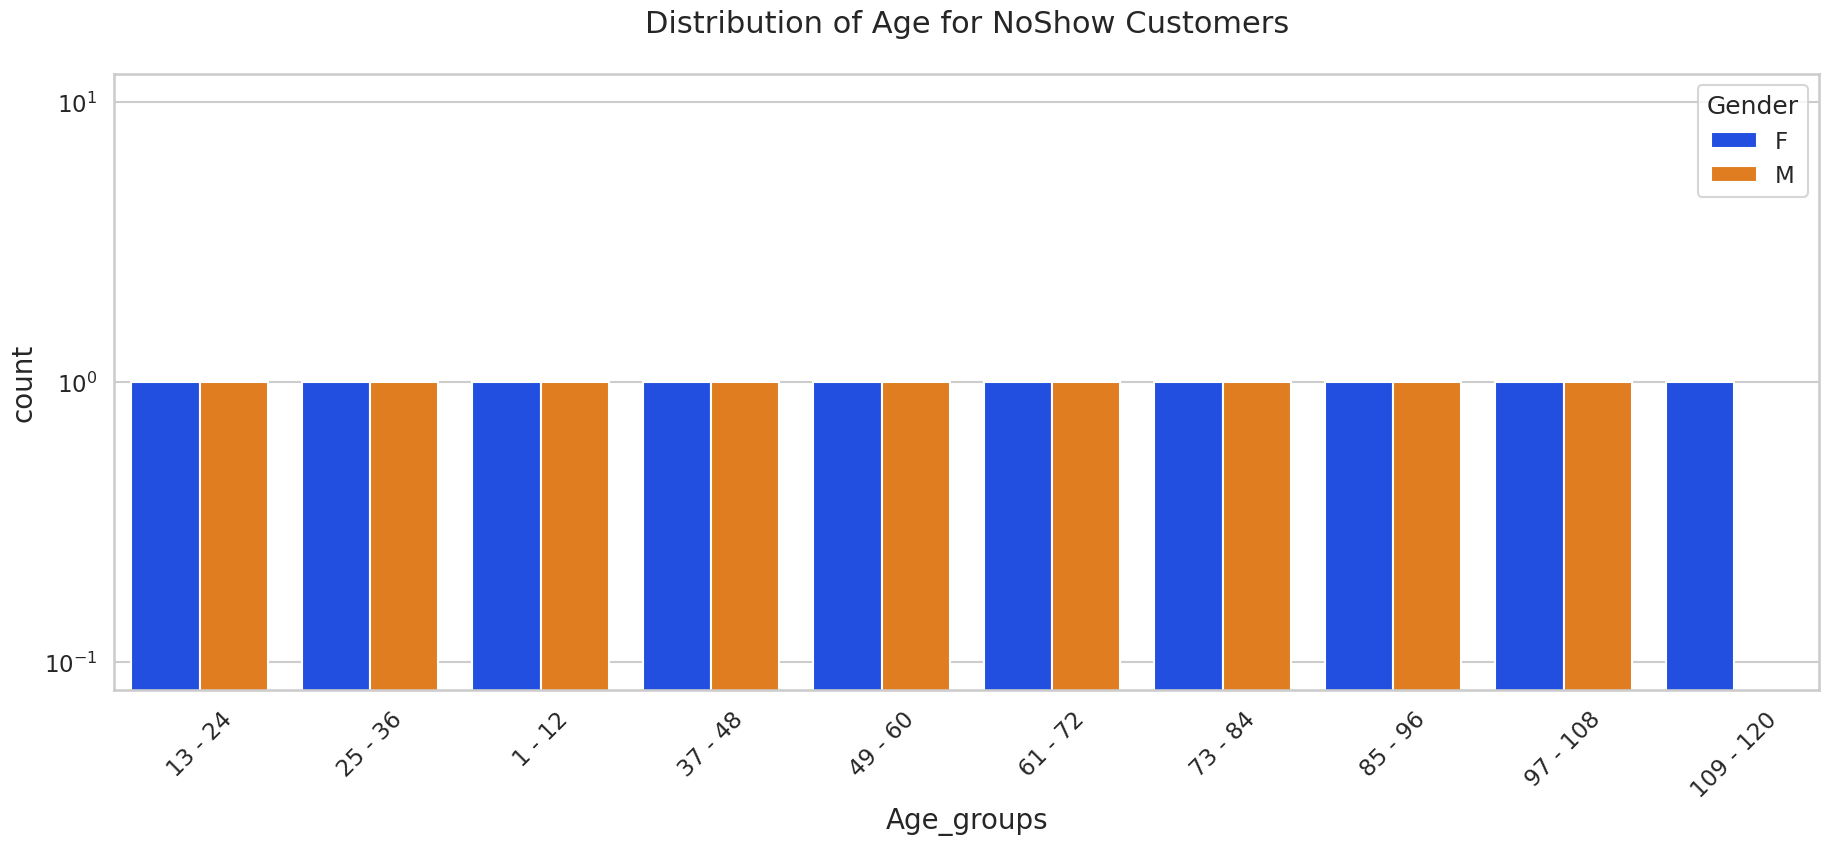

In [67]:
uniplot(new_df1_target1,col='Age_groups',title='Distribution of Age for NoShow Customers',hue='Gender')


##**Findings**




1.   Female patients have taken more appointments then male patients
2.   Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3.   Each Neighbourhood have almost 80% show rate
4.   There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5.    There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.

6.    There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.

7.   There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
8.   There is no appointments on sunday and on saturday appointments are very less in comparision to other week days









